In [1]:
# ========================================
# IMPORT LIBRARIES
# ========================================
import pandas as pd
pd.options.display.max_columns = None # Shows all columns
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True) # For notebook use
cf.go_offline() # For offline use

In [150]:
print(__version__) # requires version >= 1.9.0

3.4.1


In [2]:
# ========================================
# IMPORT DATAFRAME
# ========================================
df = pd.read_csv('data/df01.csv', sep=',', na_filter=False, index_col=0, parse_dates=['deadline','created_at','launched_at'])

In [152]:
df.shape

(173887, 15)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173887 entries, 0 to 173886
Data columns (total 15 columns):
id                       173887 non-null int64
name                     173887 non-null object
category                 173887 non-null object
goal                     173887 non-null float64
backers_count            173887 non-null int64
pledged                  173887 non-null float64
disable_communication    173887 non-null bool
country                  173887 non-null object
deadline                 173887 non-null datetime64[ns]
created_at               173887 non-null datetime64[ns]
launched_at              173887 non-null datetime64[ns]
staff_pick               173887 non-null bool
spotlight                173887 non-null bool
creator_registered       173887 non-null bool
launch_state             173887 non-null object
dtypes: bool(4), datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 16.6+ MB


In [3]:
df.isnull().sum().sum()

0

In [4]:
sum(df.isna().sum())

0

In [174]:
# ========================================
# EXPLORATORY DATA ANALYSIS
# ========================================

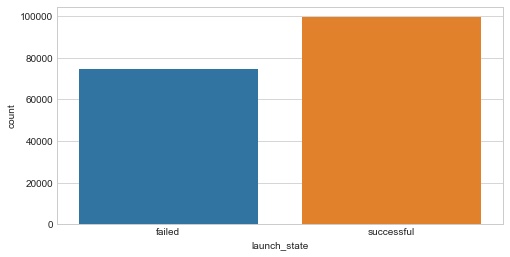

In [5]:
fig=plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='launch_state',data=df)

In [6]:
df00 = pd.read_csv('data/df00.csv')

In [7]:
df00.shape

(205696, 33)

In [8]:
df00['id'].unique().shape[0] # Find total unique projects

187074

In [9]:
df[df['launch_state'] == 'successful'].values.shape[0]

99465

In [10]:
# There are 187074 total unique projects. What is the failed percentage from this data set?
df[df['launch_state'] == 'successful'].values.shape[0] / df00['id'].unique().shape[0] * 100

53.168799512492384

In [170]:
# This shows that 53.2% of the total projects are considered 'successful'

In [171]:
df.columns

Index(['id', 'name', 'category', 'goal', 'backers_count', 'pledged',
       'disable_communication', 'country', 'deadline', 'created_at',
       'launched_at', 'staff_pick', 'spotlight', 'creator_registered',
       'launch_state'],
      dtype='object')

In [180]:
df.drop(columns=['id','name']).head(2)

category    goal  backers_count  pledged  disable_communication country  \
0  technology  3500.0              1    50.00                  False      US   
1       games   225.0             63  1613.47                  False      US   

             deadline          created_at         launched_at  staff_pick  \
0 2014-11-28 04:59:00 2014-10-16 16:19:46 2014-10-28 19:42:54       False   
1 2011-11-02 18:39:11 2011-09-28 13:44:12 2011-10-17 18:39:11        True   

   spotlight  creator_registered launch_state  
0      False                True       failed  
1       True                True   successful

C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


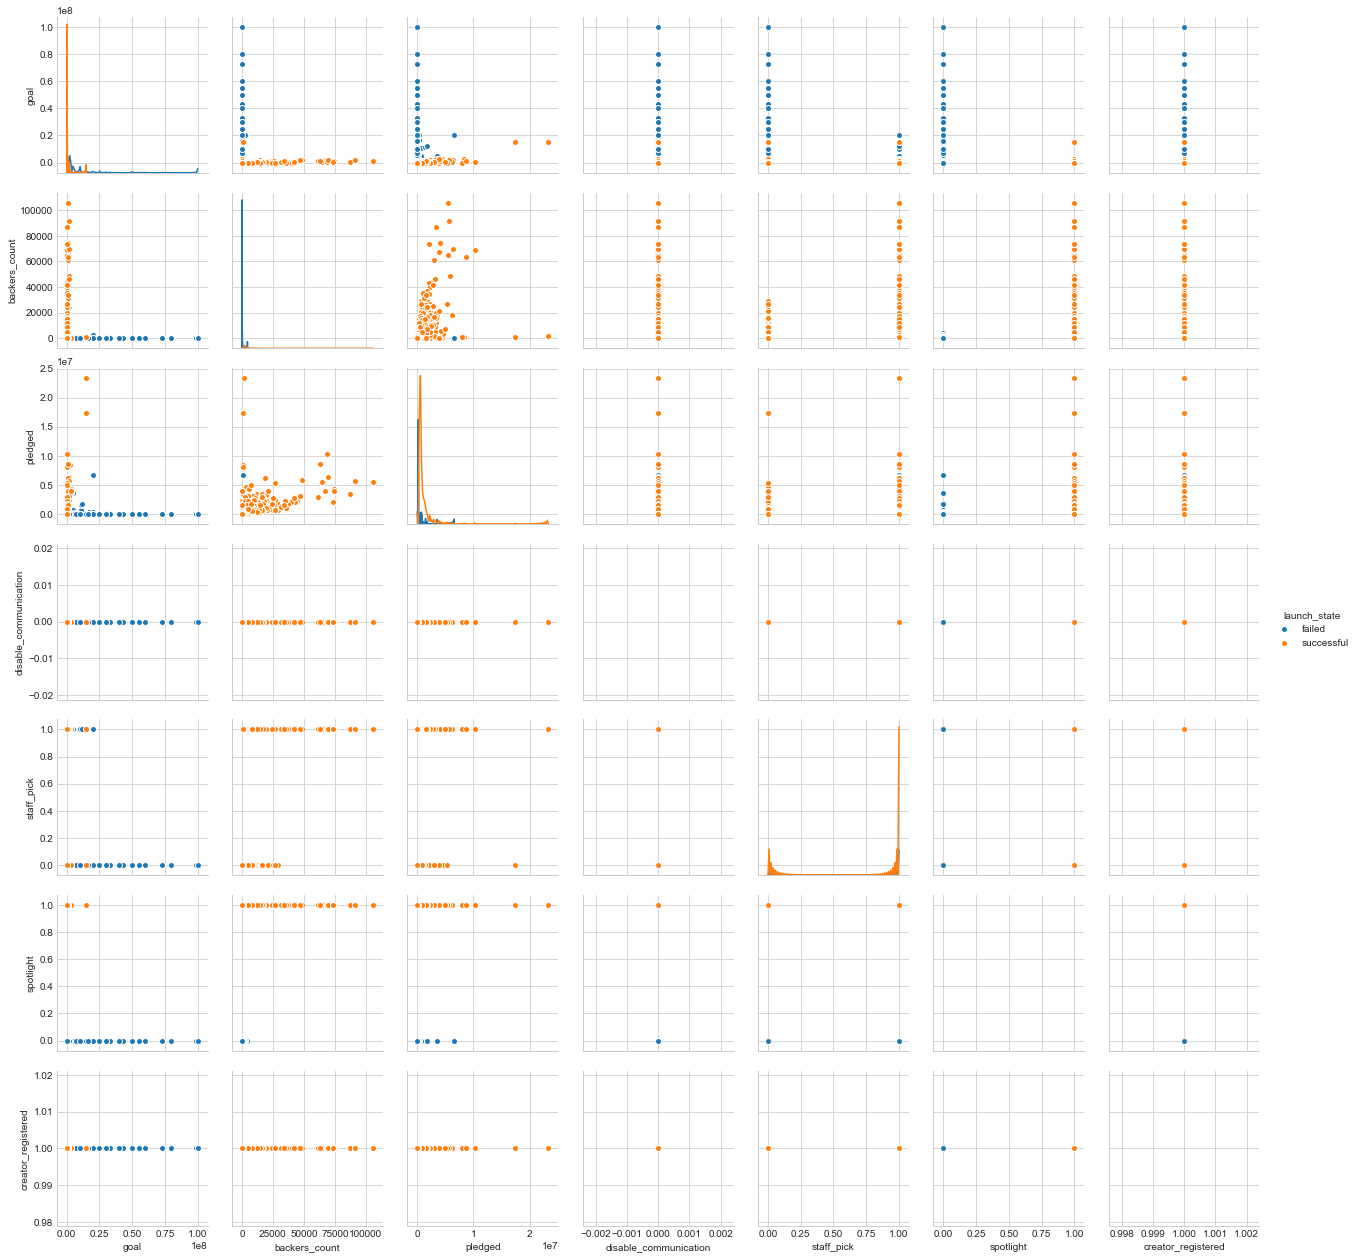

In [12]:
sns.set_style('whitegrid')
sns.pairplot(data=df.drop(columns=['id','name']), hue='launch_state', diag_kind='kde')

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173887 entries, 0 to 173886
Data columns (total 15 columns):
id                       173887 non-null int64
name                     173887 non-null object
category                 173887 non-null object
goal                     173887 non-null float64
backers_count            173887 non-null int64
pledged                  173887 non-null float64
disable_communication    173887 non-null bool
country                  173887 non-null object
deadline                 173887 non-null datetime64[ns]
created_at               173887 non-null datetime64[ns]
launched_at              173887 non-null datetime64[ns]
staff_pick               173887 non-null bool
spotlight                173887 non-null bool
creator_registered       173887 non-null bool
launch_state             173887 non-null object
dtypes: bool(4), datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 21.6+ MB


In [182]:
df.name[0]

'Jozii-College Jobs Made Easy'

In [97]:
df.head()

id  launch_state         launched_at    category country     goal  \
0   895922629             0 2014-10-28 19:42:54  technology      US   3500.0   
1  1190376005             1 2011-10-17 18:39:11       games      US    225.0   
2   672906219             1 2014-08-13 06:12:18  publishing      US   6500.0   
3  2121203785             0 2016-03-04 21:04:16     fashion      GB  15000.0   
4   434454655             1 2015-03-18 05:01:38     fashion      CA  15000.0   

   backers_count  pledged_ratio  funding_days  staff_pick  spotlight  comics  \
0              1       0.014286            30           0          0       0   
1             63       7.170978            16           1          1       0   
2            113       1.020462            30           0          1       0   
3              1       0.000067            59           0          0       0   
4             99       1.689200            35           0          1       0   

   crafts  dance  design  fashion  film & video  food  games  journalism  \
0       0      0       0        0             0     0      0           0   
1       0      0       0        0             0     0      1           0   
2       0      0       0        0             0     0      0           0   
3       0      0       0        1             0     0      0           0   
4       0      0       0        1             0     0      0           0   

   music  photography  publishing  technology  theater  AF  AG  AL  AM  AQ  \
0      0            0           0           1        0   0   0   0   0   0   
1      0            0           0           0        0   0   0   0   0   0   
2      0            0           1           0        0   0   0   0   0   0   
3      0            0           0           0        0   0   0   0   0   0   
4      0            0           0           0        0   0   0   0   0   0   

   AR  AT  AU  AX  AZ  BA  BB  BD  BE  BF  BG  BH  BJ  BM  BO  BR  BS  BT  BW  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   BY  BZ  CA  CD  CG  CH  CI  CK  CL  CM  CN  CO  CR  CU  CV  CW  CY  CZ  DE  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   DJ  DK  DM  DO  DZ  EC  EE  EG  ES  ET  FI  FJ  FM  FO  FR  GA  GB  GD  GE  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   GH  GL  GM  GN  GP  GQ  GR  GT  GU  GY  HK  HN  HR  HT  HU  ID  IE  IL  IN  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   IQ  IR  IS  IT  JM  JO  JP  KE  KG  KH  KN  KP  KR  KW  KY  KZ  LA  LB  LC  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0

Index(['id', 'launch_state', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       ...
       'VE', 'VI', 'VN', 'VU', 'WS', 'XK', 'YE', 'ZA', 'ZM', 'ZW'],
      dtype='object', length=219)

id  launch_state         launched_at    category country    goal  \
0  895922629             0 2014-10-28 19:42:54  technology      US  3500.0   

   backers_count  pledged_ratio  funding_days  staff_pick  spotlight  comics  \
0              1       0.014286            30           0          0       0   

   crafts  dance  design  fashion  film & video  food  games  journalism  \
0       0      0       0        0             0     0      0           0   

   music  photography  publishing  technology  theater  AF  AG  AL  AM  AQ  \
0      0            0           0           1        0   0   0   0   0   0   

   AR  AT  AU  AX  AZ  BA  BB  BD  BE  BF  BG  BH  BJ  BM  BO  BR  BS  BT  BW  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   BY  BZ  CA  CD  CG  CH  CI  CK  CL  CM  CN  CO  CR  CU  CV  CW  CY  CZ  DE  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   DJ  DK  DM  DO  DZ  EC  EE  EG  ES  ET  FI  FJ  FM  FO  FR  GA  GB  GD  GE  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   GH  GL  GM  GN  GP  GQ  GR  GT  GU  GY  HK  HN  HR  HT  HU  ID  IE  IL  IN  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   IQ  IR  IS  IT  JM  JO  JP  KE  KG  KH  KN  KP  KR  KW  KY  KZ  LA  LB  LC  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   LK  LR  LS  LT  LU  LV  LY  MA  MC  MD  ME  MG  MK  ML  MM  MN  MO  MR  MT  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   MU  MV  MW  MX  MY  MZ  NA  NC  NE  NG  NI  NL  NO  NP  NZ  PA  PE  PF  PG  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   PH  PK  PL  PN  PR  PS  PT  PY  QA  RO  RS  RU  RW  SA  SC  SD  SE  SG  SI  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   SJ  SK  SL  SN  SO  SR  SS  SV  SX  SY  SZ  TC  TH  TJ  TL  TN  TO  TR  TT  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   TW  TZ  UA  UG  US  UY  VA  VC  VE  VI  VN  VU  WS  XK  YE  ZA  ZM  ZW  
0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0

goal  backers_count  pledged_ratio  funding_days  staff_pick  spotlight
0  3500.0              1       0.014286            30           0          0

C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



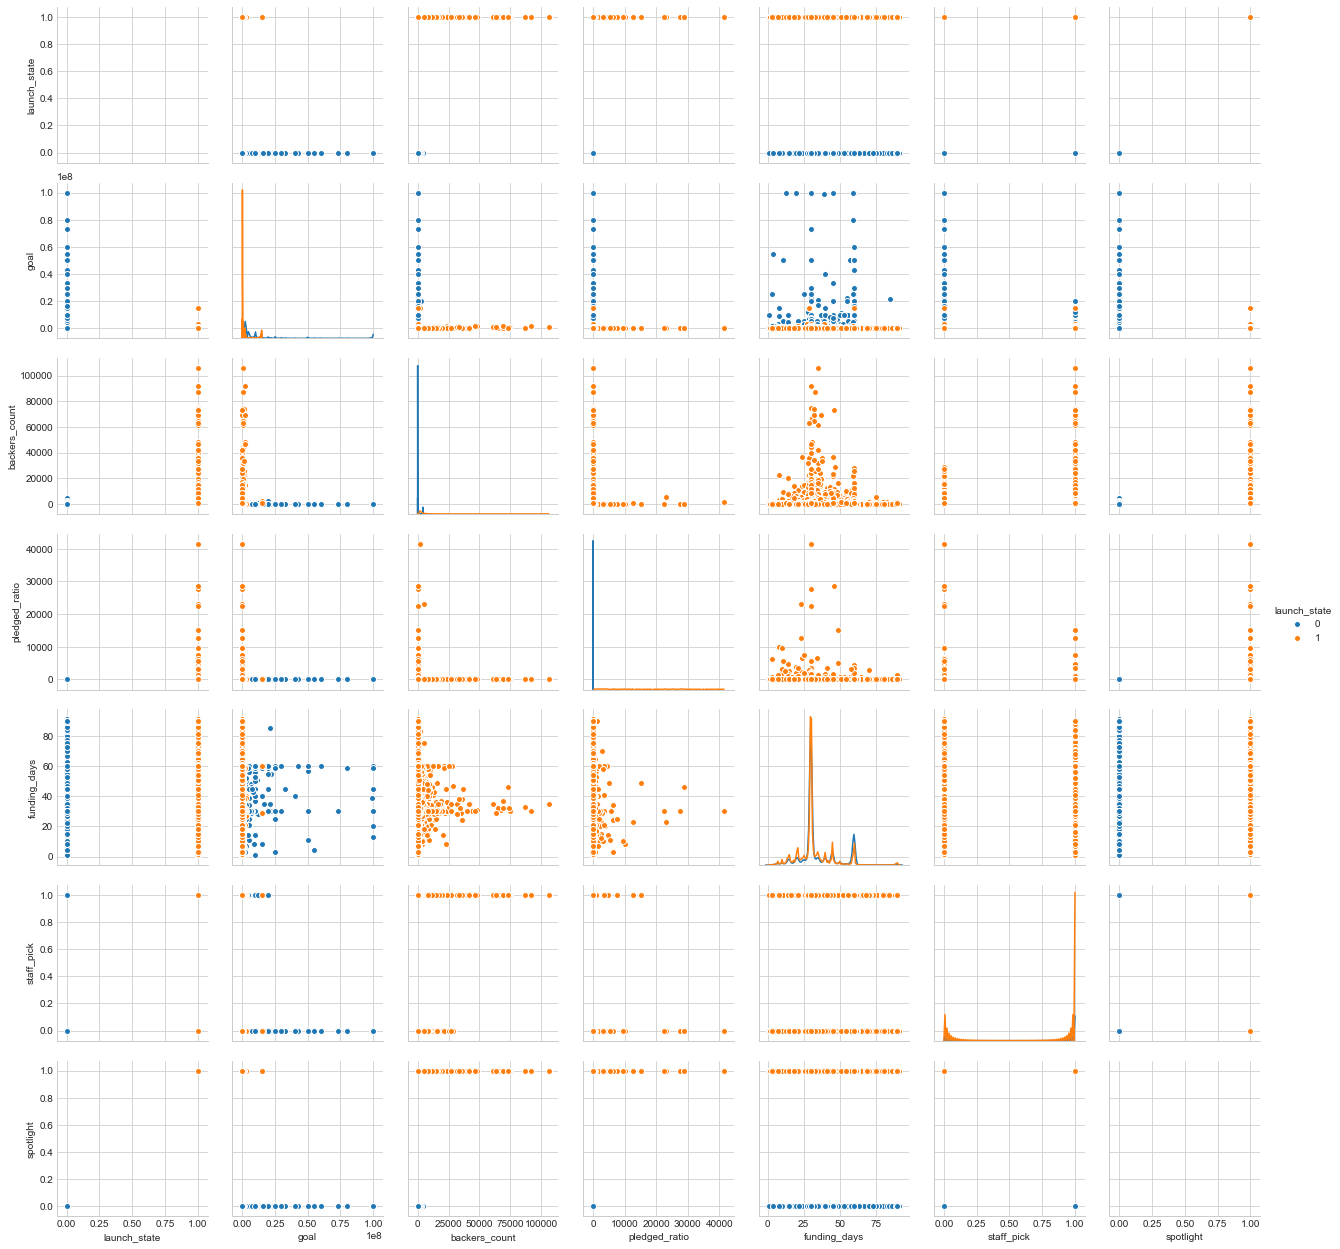

In [94]:
sns.set_style('whitegrid')
sns.pairplot(data=df.drop(df.columns[11:], axis=1).drop(columns=['id','launched_at','category','country']), 
             diag_kind='kde', hue='launch_state')

In [95]:
df.columns.values

array(['id', 'launch_state', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'spotlight', 'comics', 'crafts', 'dance', 'design', 'fashion',
       'film & video', 'food', 'games', 'journalism', 'music',
       'photography', 'publishing', 'technology', 'theater', 'AF', 'AG',
       'AL', 'AM', 'AQ', 'AR', 'AT', 'AU', 'AX', 'AZ', 'BA', 'BB', 'BD',
       'BE', 'BF', 'BG', 'BH', 'BJ', 'BM', 'BO', 'BR', 'BS', 'BT', 'BW',
       'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CK', 'CL', 'CM', 'CN',
       'CO', 'CR', 'CU', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM',
       'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'ET', 'FI', 'FJ', 'FM', 'FO',
       'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GL', 'GM', 'GN', 'GP', 'GQ',
       'GR', 'GT', 'GU', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE',
       'IL', 'IN', 'IQ', 'IR', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG',
       'KH', 'KN', 'KP', 'KR', 'KW', 'KY', 'KZ', 'LA', 'LB', 'LC

C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



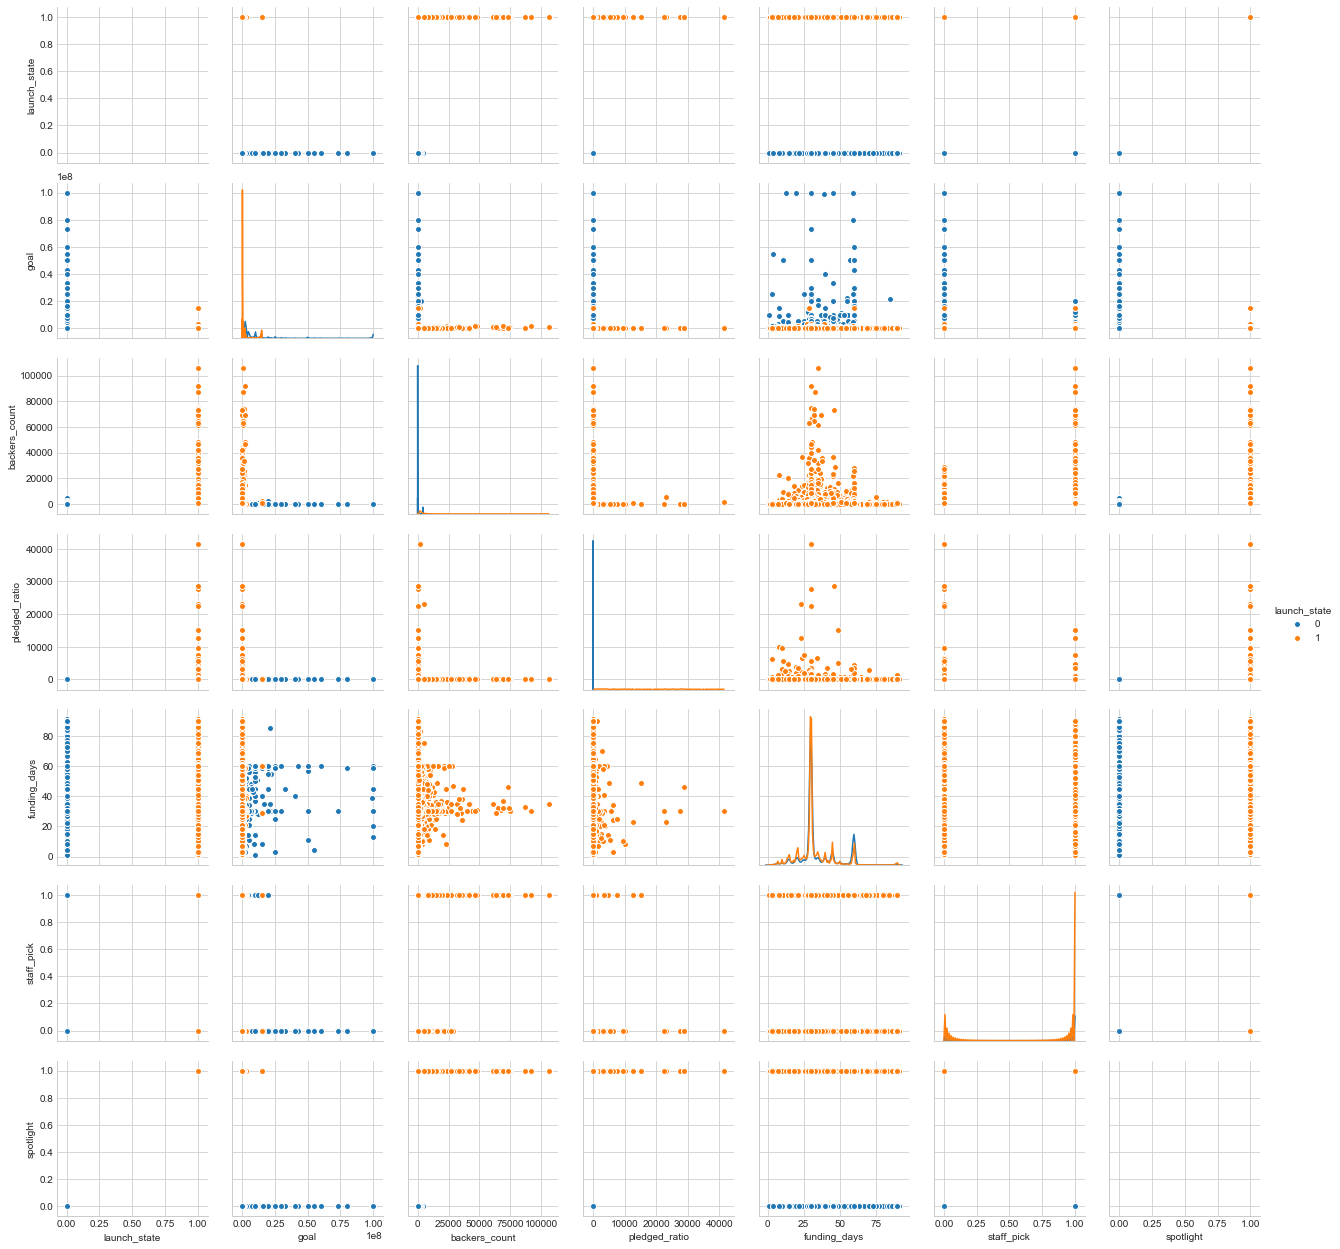

In [96]:
sns.set_style('whitegrid')
sns.pairplot(data=df.drop(df.columns[11:], axis=1).drop(columns=['id','launched_at','category','country']), diag_kind='kde', hue='launch_state')

In [279]:
df.columns.shape

(219,)

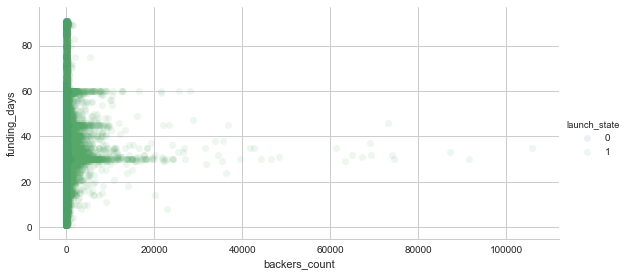

In [350]:
sns.set_style('whitegrid')
sns.lmplot("backers_count", "funding_days", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2)

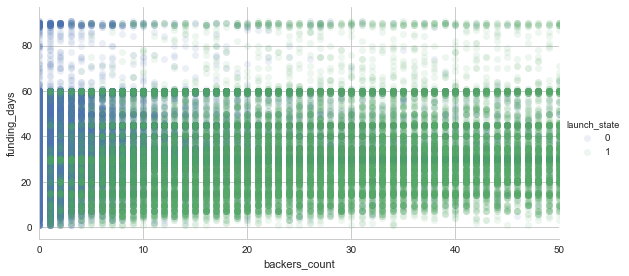

In [351]:
sns.set_style('whitegrid')
g = sns.lmplot("backers_count", "funding_days", data=df, sharex=False, hue='launch_state', 
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2)
g.set(xlim=(0,50))

C:\Users\steve\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\steve\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



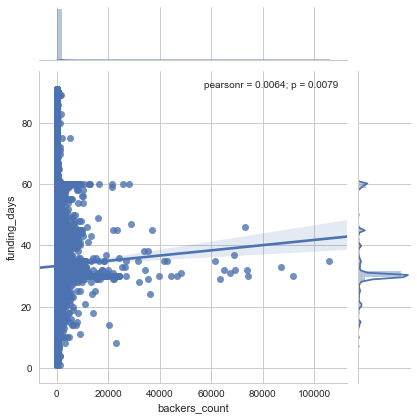

In [355]:
sns.jointplot(x='backers_count',y='funding_days',data=df, kind='reg')

C:\Users\steve\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\steve\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



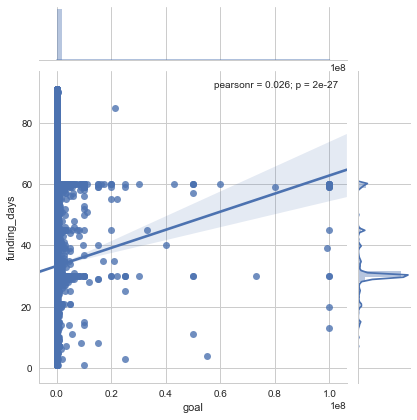

In [344]:
sns.jointplot(x='goal',y='funding_days',data=df,kind='reg')

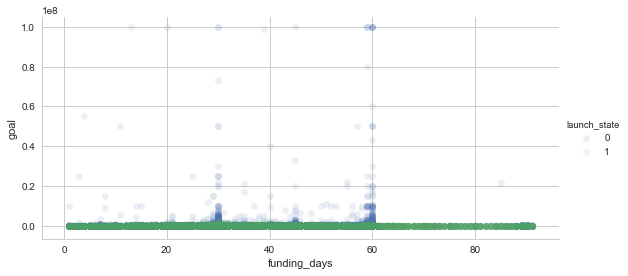

In [356]:
sns.set_style('whitegrid')
sns.lmplot("funding_days", "goal", data=df, hue='launch_state',
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2)

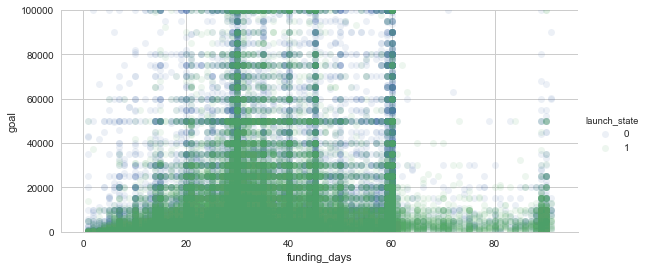

In [357]:
sns.set_style('whitegrid')
g = sns.lmplot("funding_days", "goal", data=df, sharex=False, hue='launch_state', 
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2)
g.set(ylim=(0,100e3))

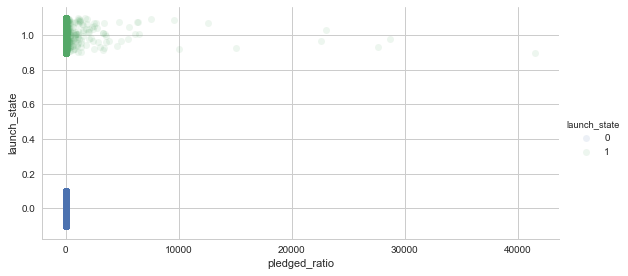

In [358]:
sns.set_style('whitegrid')
g = sns.lmplot("pledged_ratio", "launch_state", y_jitter=0.1, data=df, sharex=False, hue='launch_state', 
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2)
g.set(ylim=(None,None))

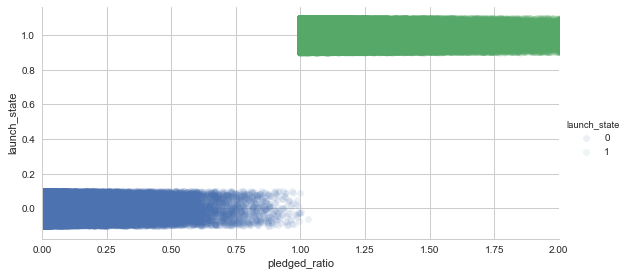

In [359]:
sns.set_style('whitegrid')
g = sns.lmplot("pledged_ratio", "launch_state", y_jitter=0.1, data=df, sharex=False, hue='launch_state', 
           fit_reg=False, scatter_kws={'alpha':0.1}, size=4, aspect=2)
g.set(xlim=(0,2), ylim=(None,None))

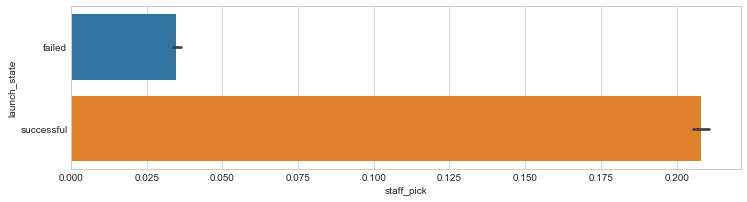

In [24]:
plt.figure(figsize=(12,3))
sns.barplot(x='staff_pick',y='launch_state',data=df)

In [110]:
df.iloc[0:1,0:11]

id  launch_state         launched_at    category country    goal  \
0  895922629             0 2014-10-28 19:42:54  technology      US  3500.0   

   backers_count  pledged_ratio  funding_days  staff_pick  spotlight  
0              1       0.014286            30           0          0

In [117]:
df['launch_state'].unique()

array([0, 1], dtype=int64)

In [187]:
df_categories = df[['launch_state','category']].groupby(["category"]).describe().reset_index()
df_categories

category launch_state                                             
                        count      mean       std  min  25%  50%  75%  max
0            art      17521.0  0.553393  0.497155  0.0  0.0  1.0  1.0  1.0
1         comics       7663.0  0.817695  0.386121  0.0  1.0  1.0  1.0  1.0
2         crafts       5325.0  0.436056  0.495941  0.0  0.0  0.0  1.0  1.0
3          dance       3052.0  0.799148  0.400703  0.0  1.0  1.0  1.0  1.0
4         design       5756.0  0.626824  0.483690  0.0  0.0  1.0  1.0  1.0
5        fashion      10162.0  0.605688  0.488726  0.0  0.0  1.0  1.0  1.0
6   film & video      23477.0  0.584530  0.492813  0.0  0.0  1.0  1.0  1.0
7           food      14601.0  0.364564  0.481324  0.0  0.0  0.0  1.0  1.0
8          games      10837.0  0.609301  0.487929  0.0  0.0  1.0  1.0  1.0
9     journalism       4074.0  0.273687  0.445905  0.0  0.0  0.0  1.0  1.0
10         music      24156.0  0.668902  0.470618  0.0  0.0  1.0  1.0  1.0
11   photography       6564.0  0.505484  0.500008  0.0  0.0  1.0  1.0  1.0
12    publishing      16623.0  0.701438  0.457641  0.0  0.0  1.0  1.0  1.0
13    technology      17765.0  0.358964  0.479710  0.0  0.0  0.0  1.0  1.0
14       theater       6311.0  0.745048  0.435869  0.0  0.0  1.0  1.0  1.0

In [188]:
df_categories.sort_values(by=[('launch_state','mean')], ascending=False)

category launch_state                                             
                        count      mean       std  min  25%  50%  75%  max
1         comics       7663.0  0.817695  0.386121  0.0  1.0  1.0  1.0  1.0
3          dance       3052.0  0.799148  0.400703  0.0  1.0  1.0  1.0  1.0
14       theater       6311.0  0.745048  0.435869  0.0  0.0  1.0  1.0  1.0
12    publishing      16623.0  0.701438  0.457641  0.0  0.0  1.0  1.0  1.0
10         music      24156.0  0.668902  0.470618  0.0  0.0  1.0  1.0  1.0
4         design       5756.0  0.626824  0.483690  0.0  0.0  1.0  1.0  1.0
8          games      10837.0  0.609301  0.487929  0.0  0.0  1.0  1.0  1.0
5        fashion      10162.0  0.605688  0.488726  0.0  0.0  1.0  1.0  1.0
6   film & video      23477.0  0.584530  0.492813  0.0  0.0  1.0  1.0  1.0
0            art      17521.0  0.553393  0.497155  0.0  0.0  1.0  1.0  1.0
11   photography       6564.0  0.505484  0.500008  0.0  0.0  1.0  1.0  1.0
2         crafts       5325.0  0.436056  0.495941  0.0  0.0  0.0  1.0  1.0
7           food      14601.0  0.364564  0.481324  0.0  0.0  0.0  1.0  1.0
13    technology      17765.0  0.358964  0.479710  0.0  0.0  0.0  1.0  1.0
9     journalism       4074.0  0.273687  0.445905  0.0  0.0  0.0  1.0  1.0

In [226]:
df_categories.iloc[:,[0,2]]

category launch_state
                         mean
0            art     0.553393
1         comics     0.817695
2         crafts     0.436056
3          dance     0.799148
4         design     0.626824
5        fashion     0.605688
6   film & video     0.584530
7           food     0.364564
8          games     0.609301
9     journalism     0.273687
10         music     0.668902
11   photography     0.505484
12    publishing     0.701438
13    technology     0.358964
14       theater     0.745048

In [233]:
df_categories[('launch_state','mean')]

0     0.553393
1     0.817695
2     0.436056
3     0.799148
4     0.626824
5     0.605688
6     0.584530
7     0.364564
8     0.609301
9     0.273687
10    0.668902
11    0.505484
12    0.701438
13    0.358964
14    0.745048
Name: (launch_state, mean), dtype: float64

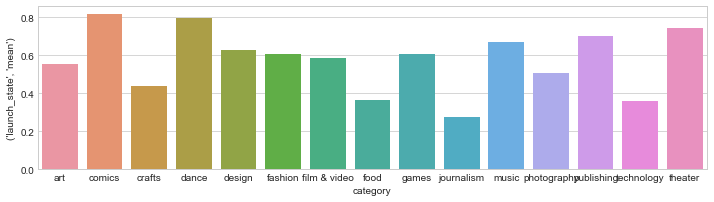

In [238]:
plt.figure(figsize=(12,3))
sns.barplot(x=df_categories['category'], y=df_categories[('launch_state','mean')])

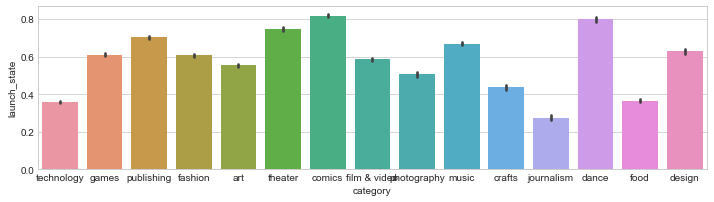

In [237]:
plt.figure(figsize=(12,3))
sns.barplot(x='category',y='launch_state',data=df)

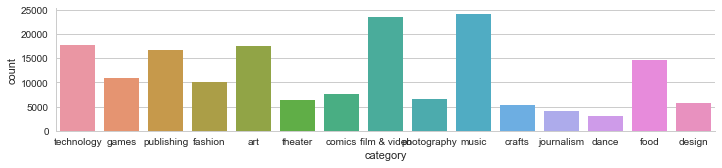

In [381]:
sns.factorplot(x='category', data=df, kind='count', size=2.5, aspect=4)

In [323]:
df.columns[0:15]

Index(['id', 'launch_state', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'spotlight', 'comics', 'crafts', 'dance', 'design'],
      dtype='object')

In [337]:
df.pivot_table(values='launch_state', columns='category', index='goal', fill_value=0.5)

category           art  comics    crafts  dance    design  fashion  \
goal                                                                 
1.000000e-02  1.000000     0.5  0.500000    0.5  0.500000     0.50   
1.000000e+00  0.838710     1.0  0.833333    0.5  1.000000     1.00   
2.000000e+00  1.000000     1.0  1.000000    0.5  1.000000     0.50   
3.000000e+00  1.000000     1.0  0.500000    0.5  0.500000     0.50   
4.000000e+00  1.000000     0.5  1.000000    0.5  1.000000     0.50   
5.000000e+00  0.857143     1.0  1.000000    1.0  1.000000     0.50   
6.000000e+00  1.000000     0.5  0.500000    0.5  0.500000     0.50   
7.000000e+00  1.000000     0.5  0.500000    1.0  0.500000     0.50   
8.000000e+00  1.000000     1.0  1.000000    0.5  0.500000     0.50   
9.000000e+00  0.500000     0.5  0.500000    0.5  0.500000     0.50   
1.000000e+01  0.675000     1.0  0.842105    0.5  1.000000     0.80   
1.100000e+01  0.500000     0.5  0.500000    0.5  0.000000     1.00   
1.200000e+01  0.571429     1.0  0.500000    0.5  0.500000     0.50   
1.300000e+01  0.500000     1.0  0.500000    0.5  1.000000     1.00   
1.400000e+01  1.000000     0.5  0.500000    0.5  1.000000     1.00   
1.500000e+01  0.571429     1.0  1.000000    0.5  1.000000     1.00   
1.600000e+01  1.000000     0.5  0.500000    0.5  0.500000     0.50   
1.700000e+01  0.500000     0.5  0.500000    0.5  0.500000     1.00   
1.800000e+01  0.500000     1.0  1.000000    0.5  0.500000     1.00   
1.900000e+01  0.500000     1.0  0.500000    0.5  0.500000     0.50   
2.000000e+01  0.771429     1.0  0.846154    0.5  0.750000     0.75   
2.010000e+01  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.100000e+01  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.200000e+01  1.000000     0.5  1.000000    0.5  0.500000     1.00   
2.300000e+01  0.500000     1.0  0.500000    0.5  0.500000     0.50   
2.400000e+01  0.500000     1.0  0.500000    0.5  0.500000     1.00   
2.500000e+01  0.851852     1.0  0.800000    0.5  0.882353     0.80   
2.600000e+01  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.700000e+01  1.000000     0.5  1.000000    0.5  0.000000     0.50   
2.800000e+01  0.500000     0.5  1.000000    0.5  1.000000     1.00   
...                ...     ...       ...    ...       ...      ...   
7.500000e+06  0.500000     0.5  0.500000    0.5  0.500000     0.50   
8.000000e+06  0.500000     0.5  0.500000    0.5  0.000000     0.50   
8.450000e+06  0.500000     0.5  0.500000    0.5  0.500000     0.50   
8.999999e+06  0.500000     0.5  0.500000    0.5  0.500000     0.50   
9.000000e+06  0.500000     0.5  0.500000    0.5  0.500000     0.00   
9.554000e+06  0.500000     0.5  0.500000    0.5  0.500000     0.50   
1.000000e+07  0.000000     0.5  0.000000    0.5  0.000000     0.50   
1.100000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
1.125000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
1.200000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
1.500000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.00   
1.625000e+07  0.500000     0.5  0.500000    0.5  0.000000     0.50   
1.700000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
1.740000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.000000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.100000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.147484e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.200000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
2.500000e+07  0.000000     0.5  0.500000    0.5  0.000000     0.50   
3.000000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
3.300000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
4.000000e+07  0.500000     0.5  0.500000    0.5  0.500000     0.50   
4.290000e+07  0.500000     0.5  0.500000    0.5  0.000000     0.50   
5.000000e+07  0.000000     0.5  0.500000    0.5  0.500000     0.50   
5.500000e+

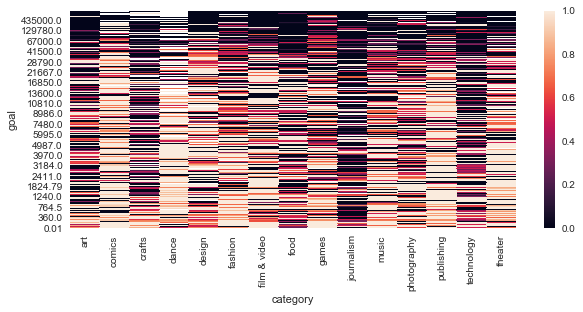

In [339]:
ax = sns.heatmap(df.pivot_table(values='launch_state', columns='category', index='goal'))
ax.invert_yaxis()

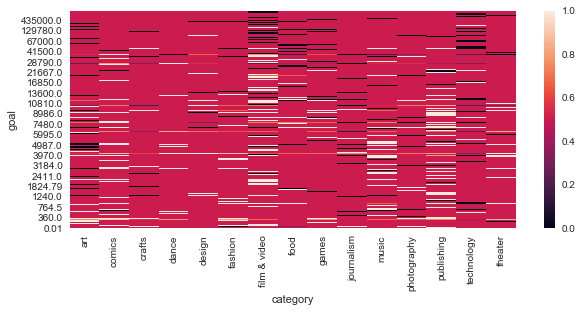

In [340]:
ax = sns.heatmap(df.pivot_table(values='launch_state', columns='category', index='goal', fill_value=0.5))
ax.invert_yaxis()

In [332]:
# It does seem like the higher the goal the less likely to succeed. Further, certain categories are clearly more successful than others.

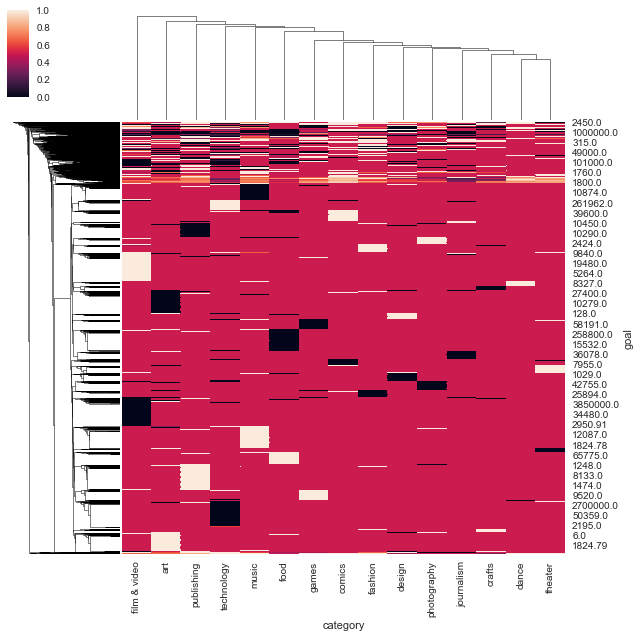

In [338]:
sns.clustermap(df.pivot_table(values='launch_state', columns='category', index='goal', fill_value=0.5))
# Note that fill_value=0.5 replaces all NaNs

In [134]:
# ========================================
# LOAD/SAVE CSV
# ========================================
df.to_csv('data/df02.csv', sep=",")

In [105]:
# df = pd.read_csv('data/df.csv', sep=',', na_filter=False, index_col=0, parse_dates=['deadline','created_at','launched_at'])